# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left(Y_n-Y_{n+h}\right)^2 = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


1)
$\mathbb{E}\left(X_{i}\right) = \frac{1}{2} \cdot1+\frac{1}{2}\cdot(-1)=0$

$\mathbb{V}\left(X_{i}\right)=\mathbb{E}\left(\left(X_{i}-\mathbb{E}\left(X_{i}\right)\right)^{2}\right) =\mathbb{E}\left(X_{i}^{2}\right)=\frac{1}{2} \cdot 1+\frac{1}{2}\cdot1 = 1$

2)
$\mathbb{E}\left(Y_{n}\right) =\sum_{i=1}^{n} \mathbb{E}\left(X_{i}\right)=0$

$\mathbb{V}\left(Y_{n}\right) =\sum_{i=1}^{n} \mathbb{V}\left(X_{i}\right)=n$

3)
Si $n \in \mathbb{N}$, $Y_{n}=\sum_{i=1}^{n} X_{i}=Y_{n-1}+X_{n}$

$Y_{|Y_{n-1}}$ ne dépend que de $X_n$ et est donc indépendant des $X_1, \ldots, X_{n-1}$ par indépendance des $X_{i}$

Par le lemme des coalitions, $Y_{|Y_{n-1}}$ indépendant des $Y_1, \ldots, Y_{n-2}$, et donc

$$\mathbb{P}_{Y_{n}|Y_{n-1}=y_{n-1}, \cdots, Y_{0}=y_{0}}=\mathbb{P}_{Y_{n}|Y_{n-1}=y_{n-1}}$$

4)
Soient  $n, n^{\prime}\in \mathbb{N} \quad n<n^{\prime}$

$$\begin{align*}
\operatorname{Cov}\left(Y_{n}, Y_{n^{\prime}}\right)&=\mathbb{E}\left(\left(Y_{n}-\mathbb{E}\left(Y_{n}\right)\right)\left(Y_{n^{\prime}}-\mathbb{E}\left(Y_{n^{\prime}}\right)\right)\right) \\

&=\mathbb{E}\left(Y_{n} Y_{n^{\prime}}\right)=\mathbb{E}\left(Y_{n} \sum_{i=1}^{n^{\prime}} X_{i}\right)\\
&=\mathbb{E}\left(Y_{n}\left(Y_{n}+\sum_{i=n+1}^{n^{\prime}} X_{i}\right)\right) \\


&=\mathbb{E}\left(Y_{n}{ }^{2}\right)+\mathbb{E}\left(Y_{n} \sum_{i=n+1}^{n^{\prime}} X_{i}\right)\\

&=\mathbb{V}\left(Y_{n}\right)+\mathbb{E}\left(Y_{n}\right) \mathbb{E}\left(\sum_{i=n+1}^{n^{\prime}}X_{i}\right)&& \text{(car $Y_n$ indépendent des $(X_i)_{i>n+1}$ par indépendance des $(X_i)$)}  \\

&=n+0=n
\end{align*}$$

Par symétrie de $n$ et $n^{\prime}$, 
$$\operatorname{Cov}\left(Y_{n}, Y_{n}^{\prime}\right)=\min \left(n, n^{\prime}\right)$$

On en déduit donc que

$$\begin{align*}
\mathbb{E}\left(\left(Y_{n}-Y_{n+h}\right)^{2}\right)&=\mathbb{E}\left(Y_{n}^{2}+Y_{n+h}^{2}-2 Y_{n} Y_{n+h}\right) \\

&=\mathbb{E}\left(Y_{n}^{2}\right)+\mathbb{E}\left(Y_{n+h}^{2}\right)-2 \mathbb{E}\left(Y_{n} Y_{n+h}\right)\\

&=\mathbb{V}\left(Y_{n}\right)+\mathbb{V}\left(Y_{n+h}\right)-2 \operatorname{Cov}\left(Y_{n}, Y_{n+h}\right)\\

&=n+n+h-2n=h
\end{align*}$$

Donc
$$\frac{1}{2} \mathbb{E}\left(\left(Y_{n}-Y_{n+h}\right)^{2}\right)=h/2$$

5)
On applique le théorème central limite (TCL) :

Les $X_i$ sont bien indépendants et identiquement distribués, leur espérance vaut $\mu=0$ et leur variance $\sigma^2=1$.

Ainsi, $\frac{Y_n-n\mu}{\sigma\sqrt{n}}\xrightarrow[n\to+\infty]{\mathcal{L}}\mathcal{N}(0,1)$

Et donc,
$$\frac{Y_n}{\sqrt{n}}\xrightarrow[n\to+\infty]{\mathcal{L}}\mathcal{N}(0,1)$$

In [2]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



1)
On vérifie les trois hypothèses :
- $\forall i \in \llbracket 0, n-1 \rrbracket, ]t_i,t_{i+1}]=]\frac{i}{n}, \frac{i+1}{n}] \ne \varnothing $
- Si $i \ne j$, $]t_i,t_{i+1}]\cap ]t_j,t_{j+1}] = \varnothing$ (En effet, si $i<j$, alors $i+1\le j$ donc $t_{i+1}\le t_j$)
- Soit $x \in ]0,1]$. $0<nx \le n$ donc il existe $i \in \mathbb{n}$ tel que $i<nx\le i+1$ et donc $x \in ]t_i,t_{i+1}] \subset \bigcup_{i=0}^{n-1}]t_i,t_{i+1}]$. Ainsi, $\bigcup_{i=0}^{n-1}]t_i,t_{i+1}]=]0,1]$

Nous avons donc bien une partition de $]0,1]$.

2)
Soit $t\in ]0,1]$, soit $i=[nt] \in \llbracket 0, n-1 \rrbracket$.

$Z_{t_i}^{(n)}=\frac{Y_{[nt_i]}}{\sqrt{n}} = \frac{Y_{[i]}}{\sqrt{n}}=\frac{Y_i}{\sqrt{n}}=\frac{Y_{[nt]}}{\sqrt{n}}=Z_{t}^{(n)}$

3)


In [32]:
def alea(n):
    #renvoie un vecteur de dimension n de 1 ou -1 aléatoirement avec la même probabilité
    X=np.random.binomial(1,0.5,n)
    return 2*X-1
import matplotlib.pyplot as plt
def print_Z(n):
    # trace la liste des Z_ti(n) avec i entre 0 et n
    L=[] #L sera la liste en question
    Y=0 #Y est la somme des X_i
    X=alea(n+1) #on génère les X_i
    for i in range(n+1):
        Y+=X[i]
        L.append(Y/n**0.5)
    X=list(range(n+1))
    plt.plot(X,L)
    plt.xlabel("t")
    plt.ylabel("Z(t,n)")
    plt.show()

1001


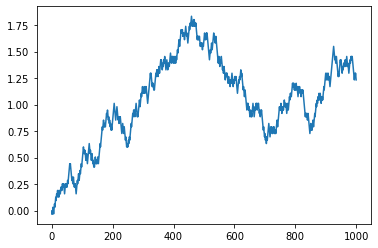

In [5]:
print_Z(1000)

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



Soit $t\in[0,1]$, $Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}$
D'après la question 5. de la partie précédente, $\frac{Y_{[nt]}}{\sqrt{[nt]}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$

Or, $Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}$
$= \frac{Y_{[nt]}}{\sqrt{[nt]}} . \frac{\sqrt{[nt]}}{\sqrt{n}}$

Et $\frac{\sqrt{[nt]}}{\sqrt{n}} \sim \sqrt{t}$

Donc $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t)$

In [6]:
def Z1(n):
    # renvoie une valeur de Z_1(n)
    Y=0
    X=alea(n) #on génère les X_i
    for i in range(n):
        Y+=X[i]
    return Y/(n**0.5)

def print_Z1(n,nb):
    # affiche l'histogramme de nb valeurs de Z1(n)
    plt.hist([Z1(n) for i in range(nb)],50,density=True, label = "Data")
    X=np.linspace(-4,4,n)
    plt.plot(X,sps.norm.pdf(X),"r",label="Theory")
    plt.legend(loc="best")
    plt.show()

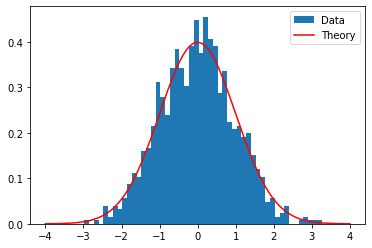

In [7]:
n,nb=10000,1000
print_Z1(n,nb)

L'histogramme obtenu correspond bien avec la loi gaussienne centrée réduite.

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

On discrétise l'intervalle $[0,1]$ en $\bigcup_{i=0}^{r-1}[t_i,t_{i+1}]$, avec $t_i = \frac{i}{r}$ pour tout $i$.

$r$ représente le nombre de points $t_i$, c'est-à-dire la resolution de la marche aléatoire.

In [35]:
def list_Z_bis(n,resolution):
    # renvoie la liste des Z_ti_bis(n) avec i entre 0 et résolution
    L=np.zeros(resolution) #sera la liste des Z_ti(n)
    U=np.random.random(size=n) #on génère les U_i
    X=alea(n) #on génère les X_i
    for j in range(n): 
        for i in range(resolution):
            if i/resolution<U[j]:
                L[i]+=X[j]
            else :
                L[i]-=X[j]
    return L/np.sqrt(n)

def print_Z_bis(n,resolution):
    X=np.linspace(0,1,resolution)
    plt.plot(X,list_Z_bis(n,resolution))
    plt.xlabel("t")
    plt.ylabel("Z(t,n)")
    plt.show()

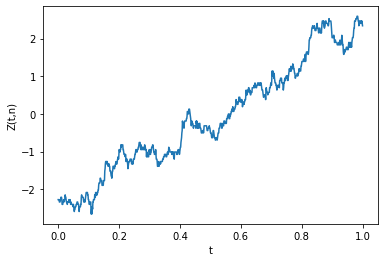

In [36]:
n=1000
resolution = 1000
print_Z_bis(n,resolution)

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

On écrit :

$$ \begin{align*}
\tilde{Z}^{(n)}_t&=\frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))\\

&=\frac{1}{\sqrt{n}}\sum_{i=1}^n\tilde{X}_i\\

&=\frac{1}{\sqrt{n}}\tilde{Y}^{(n)}_t
\end{align*}$$

On calcule l'espérance et la variance des $\tilde{X}_i$

$\mathbb{E}\left(\tilde{X}_i\right)$
$=\mathbb{E}\left(X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))\right)$
$=\mathbb{E}\left(X_i\right) \mathbb{E}\left(1_{[0,U_i]}(t)-1_{]U_i,1]}(t)\right)$ par indépendance.

or, $\mathbb{E}\left(X_i\right)=0$

donc $\mathbb{E}\left(\tilde{X}_i\right)=0$
et donc $\mathbb{E}\left(\tilde{Z}^{(n)}_t\right)=0$


$\mathbb{V}\left(\tilde{X}_i\right) = \mathbb{V}\left(X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))\right)
=\mathbb{E}\left(X_i^2 (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))^2\right)$

Tous les termes ne peuvent valoir que 1, on en déduit que $\mathbb{V}\left(\tilde{X}_i\right)=1$

et donc que $\mathbb{V}\left(\tilde{Y}^{(n)}_t\right)=n$

et que $\mathbb{Z}\left(\tilde{Y}^{(n)}_t\right)=\mathbb{V}\left(\frac{1}{\sqrt{n}}\tilde{Y}^{(n)}_t\right)=\frac{n}{n}=1$

Puisque les $\tilde{X}_i$ sont indépendants, identiquement distribués, d'espérance 0 et de variance 1, on obtient avec le théorème central limite :

$$\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$$

In [10]:
def Z_bis(t,n):
    # renvoie une valeur de Z_bis_t(n)
    Y=0
    U=np.random.random(n) #on génère les U_i
    X=alea(n) #on génère les X_i
    for i in range(n): #on somme pour i allant de 1 à n
        if t<U[i]:
            Y+=X[i]
        else :
            Y-=X[i]
    return Y/(n**0.5)

def print_Z1_bis(n,nb,points):
    # affiche l'histogramme des Z1bis,
    # où nb est la taille de l'échantillon
    # et points est la liste des points où on veut vérifier la loi normale
    for t in points:
        plt.hist([Z_bis(t,n) for i in range(nb)],50,density=True, label = "Data")
        X=np.linspace(-4,4,n)
        plt.plot(X,sps.norm.pdf(X),"r",label="Theory")
        plt.legend(loc="best")
        plt.title(f"Au point {t=}")
        plt.show()

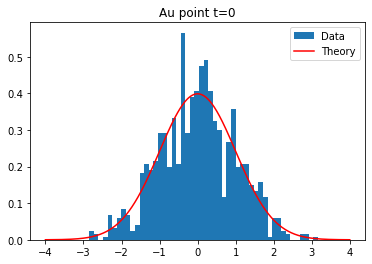

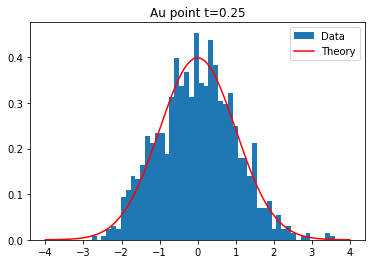

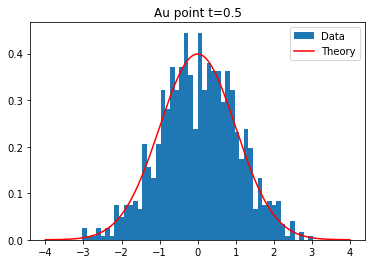

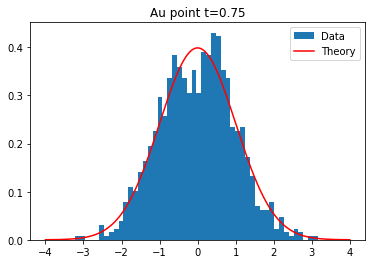

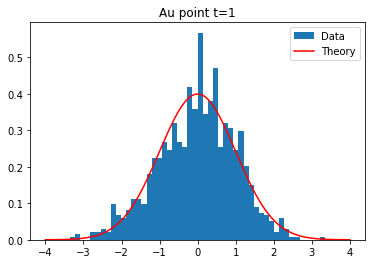

In [11]:
points = [0,0.25,0.5,0.75,1]
n,nb=1000,1000
print_Z1_bis(n,nb,points)

3. Montrer que $\frac12\mathbb{E}\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2 = 2h$ pour $h>0$ et tel que $t+h \leq 1$.

$\mathbb{E}\left(\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2\right)$
$= \mathbb{E}\left({\tilde{Z}^{(n)}_t}^2\right)+\mathbb{E}\left({\tilde{Z}^{(n)}_{t+h}}^2\right)-2\mathbb{E}\left(\tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h}\right)$

D'après la question 2, on sait que $\mathbb{E}\left({\tilde{Z}^{(n)}_t}^2\right)= \mathbb{V}\left( \tilde{Z}^{(n)}_t\right)=1$

$\mathbb{E}\left(\tilde{Z}^{n}_t \tilde{Z}^{n}_{t+h}\right)$

$=\frac{1}{n}\mathbb{E}\left(\tilde{Y}_{n}(t)\tilde{Y}_{n}(t+h)\right)$

$=\frac{1}{n}\sum_{i}\mathbb{E}\left(\tilde{X}_{i}(t)\tilde{X}_{i}(t+h)\right)+\frac{1}{n}\sum_{i,j|j\ne i}\mathbb{E}\left(\tilde{X}_{i}(t)\tilde{X}_{j}(t+h)\right)$

$=\frac{1}{n}\sum_{i}\mathbb{E}\left({X_{i}}^2(\mathbb{1}_{[0,U_i]}(t)-\mathbb{1}_{]U_i,0]}(t))(\mathbb{1}_{[0,U_i]}(t+h)-\mathbb{1}_{]U_i,0]}(t+h))\right)$

On distingue ensuite les cas :
- Si $U_i \in [0,t],{X_{i}}^2(\mathbb{1}_{[0,U_i]}(t)-\mathbb{1}_{]U_i,0]}(t))(\mathbb{1}_{[0,U_i]}(t+h)-\mathbb{1}_{]U_i,0]}(t+h))=1$
- Si $U_i \in [t,t+h], {X_{i}}^2(\mathbb{1}_{[0,U_i]}(t)-\mathbb{1}_{]U_i,0]}(t))(\mathbb{1}_{[0,U_i]}(t+h)-\mathbb{1}_{]U_i,0]}(t+h))=-1$
- Si $U_i \in [t+h,1], {X_{i}}^2(\mathbb{1}_{[0,U_i]}(t)-\mathbb{1}_{]U_i,0]}(t))(\mathbb{1}_{[0,U_i]}(t+h)-\mathbb{1}_{]U_i,0]}(t+h))=1$

On obtient donc :

$=\frac{1}{n}\sum_{i=1}^{n}1(1-t-h)+(-1)h+t = 1-2h$

En définitive,

$\frac{1}{2}\mathbb{E}\left(\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2\right)$
$=\frac{1}{2}(1+1-2(1-2h))=2h$

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

On se restreint à ne considérer que les couples $(t_i,t_j)$ tels que $t_j=t_i+h$. En effet, la somme telle qu'exprimée ci-dessus compte chaque couple $(i,j)$ et $(j,i)$ séparément, alors qu'ils ajoutent le même terme à la somme. On peut donc ne compter qu'un seul des deux, dans la somme et dans le cardinal.

In [38]:
def print_q4(n,r):
    #trace la somme souhaitée pour les valeurs de h demandées
    kmax=int(np.round(0.3*r)) #h=k/r, donc kmax=hmax*r=0.3*r. On règle les problèmes d'approximation des flottants avec np.round
    L=list_Z_bis(n,r) # la liste des Z_bis(ti,n) pour tous les ti
    H=[]
    Y=[]
    for k in range(1,kmax+1):
        h=k/r
        H.append(h)
        S=0
        for i in range(r-k):
            j=i+k  #ti=i/n, tj=ti+h=(i+k)/n
            S+=(L[i]-L[j])**2
        Y.append(S/(2*(r-k)))
    plt.plot(H,Y)
    plt.plot(H,2*np.array(H),c="r")
    plt.xlabel("h")
    plt.show()

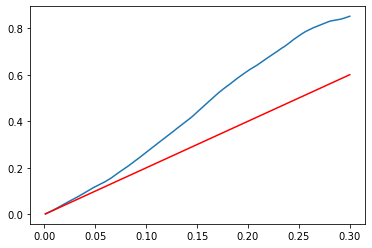

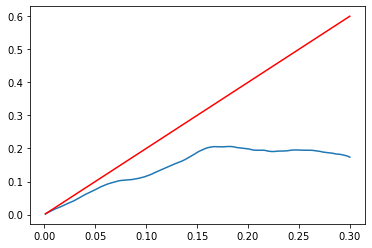

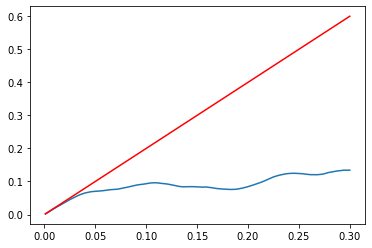

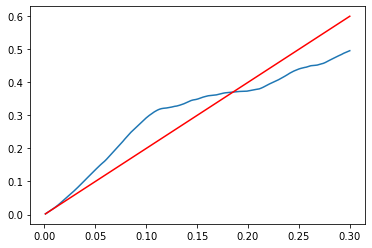

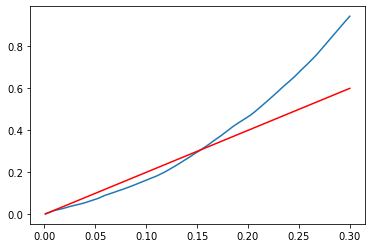

In [13]:
n=1000
resolution = 1000
print_q4(n,resolution)
print_q4(n,resolution)
print_q4(n,resolution)
print_q4(n,resolution)
print_q4(n,resolution)

Le résultat obtenu est très variable. Cela est du au fait que l'on ne calcule qu'une seule fois la liste des $\tilde{Z}^{n}_{t_i}$ (pour gagner du temps de calcul). Si on veut remédier à cela, il faut les recalculer à chaque fois, ce qui augment rapidement la complexité de l'algorithme mais donne un résultat semblable à chaque itération.

In [39]:
def print_q4(n,r):
    #trace la somme souhaitée pour les valeurs de h demandées en recalculant les Z_i pour chaque h.
    kmax=int(np.round(0.3*r))
    H=[]
    Y=[]
    for k in range(1,kmax+1):
        L=list_Z_bis(n,r) # la liste des Z_bis(ti,n) pour tous les ti est recalculée à chaque fois
        h=k/r
        H.append(h)
        S=0
        for i in range(r-k):
            j=i+k  #ti=i/n, tj=ti+h=(i+k)/n
            S+=(L[i]-L[j])**2
        Y.append(S/(2*(r-k)))
    plt.scatter(H,Y,marker="+")
    plt.plot(H,2*np.array(H),c="r")
    plt.xlabel("h")
    plt.show()

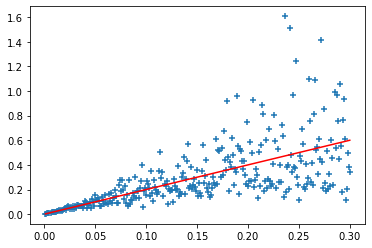

In [37]:
n=1000
resolution = 1000
print_q4(n,resolution)

5. Décrire les différences et les similarités entre les deux approches.

Cette nouvelle approche permet de définir la marche aléatoire sur tout l'intervalle $[0,1]$. En effet, à partir des variables $X_1, .. X_n$, on définit toutes les valeurs de la n-e étape de la marche pour les $t_i=i/n$.

Cela revient finalement diviser $n$ fois notre intervalle $[0,1]$ en deux parties, l'une recevra $X_i$, et l'autre $-X_i$ à chaque étape. Chaque partie a une probabilité 1/2 de recevoir 1 et -1, et ce $n$ fois. C'est une généralisation de la première méthode, qui revient à calculer cette nouvelle variable en un unique point ($t=0$ par exemple).

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

In [16]:
def droite_aléatoire(n):
    #trace n droites aléatoires sur [-1,1]^2
    A=np.random.uniform(0,np.pi,n)
    P=np.random.uniform(-2**0.5,2**0.5,n)
    X=np.linspace(-1,1,100)
    for i in range(n):
        Y=[(P[i]-x*np.cos(A[i]))/np.sin(A[i]) for x in X]
        plt.plot(X,Y)
    plt.ylim(-1,1)
    plt.legend([f"{i+1}" for i in range(n)], loc="best")
    plt.show()

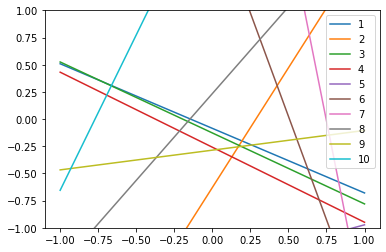

In [17]:
n=10
droite_aléatoire(n)

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

In [18]:
def separate_domain(resolution):
    #trace une droite sur [-1,1]^2 et attribue +1 ou -1 à chaque côté
    a=np.random.uniform(0,np.pi)
    p=np.random.uniform(-2**0.5,2**0.5)
    X=np.linspace(-1,1,resolution)
    Y=np.linspace(-1,1,resolution)
    grx,gry=np.meshgrid(X,Y)
    Z=(grx*np.cos(a)+gry*np.sin(a) - p)/np.abs(grx*np.cos(a)+gry*np.sin(a) - p) #la droite
    plt.plot(X,[(p-x*np.cos(a))/np.sin(a) for x in X],color = "r")
    plt.ylim(-1,1)
    c=plt.pcolormesh(grx,gry,Z,vmin=-1, vmax=1)
    plt.colorbar(c)
    plt.show()

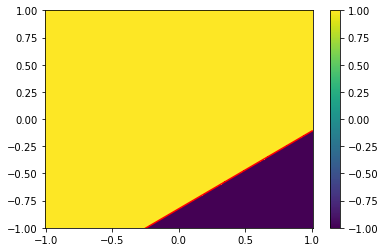

In [19]:
resolution=200
separate_domain(resolution)

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

Chaque droite sépare le domaine en deux en associant +1 ou -1 à chaque point. En itérant ce procédé, la marche aléatoire sera définie sur $[-1,1]^2$

In [20]:
def marche_aleatoire(resolution,n):
    #trace n droites et ajoute +1 ou -1 de part et d'autre pour chaque point
    A=np.random.uniform(0,np.pi,n)
    P=np.random.uniform(-2**0.5,2**0.5,n)
    X=np.linspace(-1,1,resolution)
    Y=np.linspace(-1,1,resolution)
    grx,gry=np.meshgrid(X,Y)
    S=np.zeros((resolution,resolution))
    for k in range(n):
        Z=grx*np.cos(A[k])+gry*np.sin(A[k]) - P[k]
        x=alea(1) #on choisit aléatoirement quelle partie recevra la valeur -1 et l'autre 1
        for i in range(resolution):
            for j in range(resolution):
                if Z[i][j]>0:
                    S[i][j]+=x
                else:
                    S[i][j]-=x
    return grx,gry,S/n**0.5
    
def print_marche_aleatoire(grx,gry,Z):
    c=plt.pcolormesh(grx,gry,Z)
    plt.colorbar(c)
    plt.show()

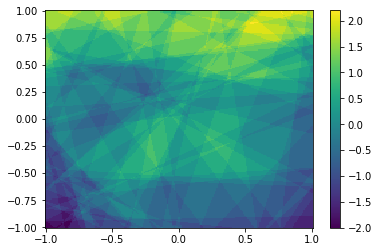

In [21]:
resolution=200
n=100
print_marche_aleatoire(*marche_aleatoire(resolution,n))

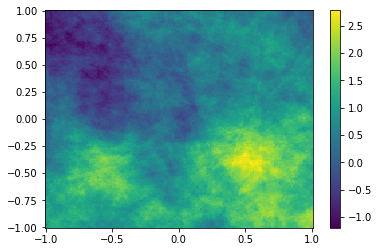

In [22]:
resolution=200
n=1000
print_marche_aleatoire(*marche_aleatoire(resolution,n))

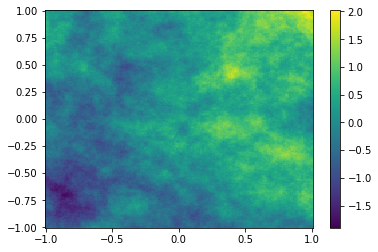

In [23]:
resolution=200
n=10000
print_marche_aleatoire(*marche_aleatoire(resolution,n))

On obtient des valeurs aléatoires sur l'ensemble du graphe. On remarque que la plupart des points ont une valeur moyenne (en bleu), et que peu de points ont des valeurs extrêmes (en jaune et violet). On a donc bien défini une marché aléatoire sur $[-1,1]^2$.

On constate que cette méthode est une généralisation de la méthode précédente à deux dimensions. Avant, on séparait à chaque étape l'intervalle $[0,1]$ en deux parties avec une variable aléatoire $U_i$, et chaque partie recevait $+1$ ou $-1$.

Maintenant, à chaque étape, c'est $[-1,1]^2$ qui est divisé en deux par une droite, grâce aux variables aléatoires $\alpha_i$ et $p_i$, et chaque partie reçoit aléatoirement encore $+1$ ou $-1$.

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

On adapte l'algorithme de la question 4) de la partie précédente :

In [24]:
def print_q4_bis(resolution,n):
    #trace la somme demandée en fonction de h, pour les valeurs de h idoines
    kmax=int(np.round(resolution*0.3))
    grx,gry,Z=marche_aleatoire(resolution,n)
    H=[]
    Y=[]
    for k in range(1,kmax+1):
        h=k/resolution
        H.append(h)
        S=0
        #on commence par sommet sur les axes horizontaux
        for ligne in range(resolution): # on fixe la ligne
            for i in range(resolution-k): #on somme sur les axes verticaux et horizontaux
                j=i+k #ti=(xi,i/n), tj=ti+h=(xi,(i+k)/n)
                S+=(Z[ligne,i]-Z[ligne,j])**2
        #on somme aussi sur les axes verticaux
        for colonne in range(resolution): #on fixe la colonne
            for i in range(resolution-k):
                j=i+k
                S+=(Z[i,colonne]-Z[j,colonne])**2
        N=2*resolution*(resolution-k)
        Y.append(S/(2*N))
    plt.plot(H,Y)
    plt.plot(H,np.array(H),c="r")
    plt.show()

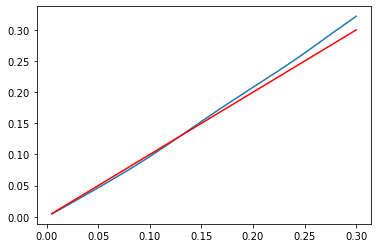

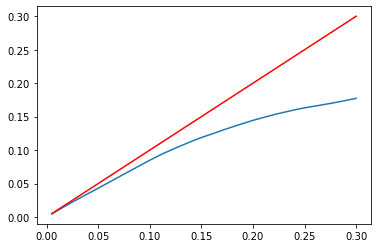

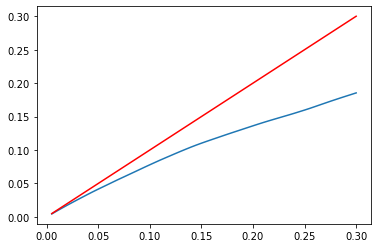

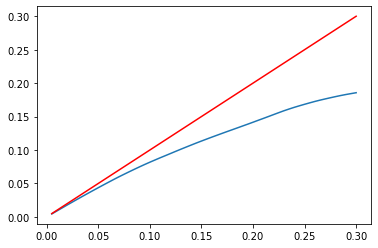

In [25]:
resolution=200
n=1000
print_q4_bis(resolution,n)
print_q4_bis(resolution,n)
print_q4_bis(resolution,n)
print_q4_bis(resolution,n)

Dans la majorité des cas, la valeur obtenue s'aligne sur $h$ (les courbes rouges et bleues se superposent).
Cela signifie que $\frac12\mathbb{E}\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2=h$, on retrouve un résultat semblable à celui de la partie précédente.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

Pour générer sur $[-10,10]$, il ne faut pas prendre p dans $[-\sqrt{2},\sqrt{2}]$, mais de sorte que $p_{max}$ corresponde au rayon du cercle d'origine $O$ passant par $(10,10)$. En effet, la méthode utilisée pour générer une droite aléatoire est de choisir un rayon $p$, puis une angle $\alpha$, et de tracer la tangente au cercle au point d'argument $\alpha$.

Avec le théorème de Pythagore, $p_{max}^2=10^2+10^2=200$, donc $p_{max}=10\sqrt{2}$

In [26]:
def marche_aleatoire_generalisee(resolution,n,taille):
    # trace la marche aléatoire avec n droites sur le domaine [-taille,taille]^2
    A=np.random.uniform(0,np.pi,n)
    P=np.random.uniform(-2**0.5,taille*2**0.5,n)
    X=np.linspace(-taille,taille,resolution)
    Y=np.linspace(-taille,taille,resolution)
    grx,gry=np.meshgrid(X,Y)
    S=np.zeros((resolution,resolution))
    for k in range(n):
        Z=grx*np.cos(A[k])+gry*np.sin(A[k]) - P[k]
        x=alea(1) #on choisit aléatoirement quelle partie recevra la valeur -1 et l'autre 1
        for i in range(resolution):
            for j in range(resolution):
                if Z[i][j]>0:
                    S[i][j]+=x
                else:
                    S[i][j]-=x
    return grx,gry,S/n**0.5

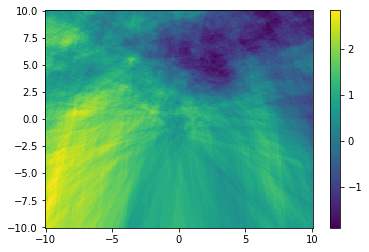

In [27]:
resolution=200
n=1000
taille=10
print_marche_aleatoire(*marche_aleatoire_generalisee(resolution,n,taille))

On obtient une marche aléatoire comparable

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?

Nous nous ramenons à une liste de taille $n^2$ en juxtaposant les $n$ lignes de la matrice des $(x_i,y_j)$.
Cela nous permet d'utiliser la simulation d'un vecteur gaussion à densité à partir de sa matrice de covariance vue dans le cours.

Le problème rencontré est que la matrice $C$ définie comme ${Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$ avec $x_i,x_j \in \left\{ 0,1, \cdots , n-1 \right\}$ n'est pas définie positive. En effet, les 4 premières lignes et colonnes sont nulles.
Pour résoudre cela, on prend les $x_i, x_j$ dans $\left\{ 1,2, \cdots, n \right\}$

In [28]:
def mouvement_brownien(n):    
    C=np.zeros((n**2,n**2))
    for i in range(n**2):
        for j in range(n**2):
            xi=i//n +1
            xj=j//n +1
            yi=i%n +1
            yj=j%n +1
            C[i][j]=min(xi,xj)*min(yi,yj)
    L=np.linalg.cholesky(C)
    Y=sps.norm.rvs(size=n**2)
    Z=L@Y
    return Z

In [29]:
def vect_to_matrice(Z):
    n=np.sqrt(len(Z))
    n=int(np.round(n))
    M=np.zeros((n,n))
    for i in range(n):
        M[i][:]=Z[n*i:n*(i+1)]
    return M

In [30]:
def print_mouvement_brownien(n):
    position_x=np.linspace(0,1,n)
    position_y=np.linspace(0,1,n)
    grx,gry=np.meshgrid(position_x,position_y)
    Z=vect_to_matrice(mouvement_brownien(n))
    print_marche_aleatoire(grx,gry,Z)

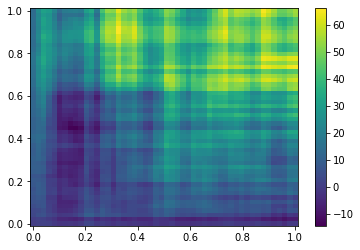

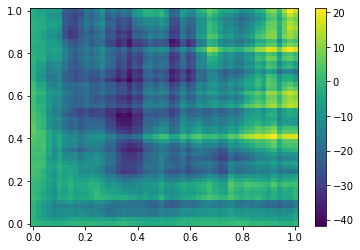

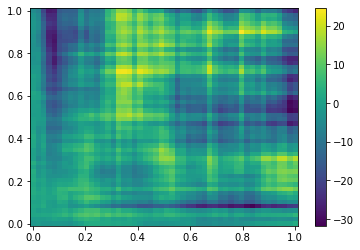

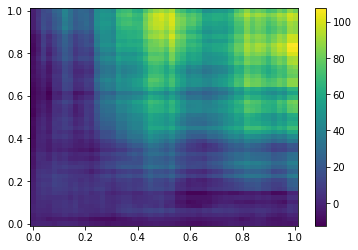

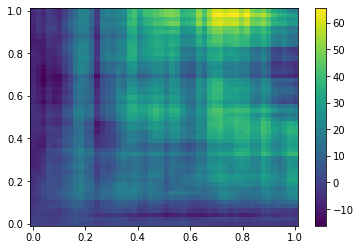

In [31]:
print_mouvement_brownien(50)
print_mouvement_brownien(50)
print_mouvement_brownien(50)
print_mouvement_brownien(50)
print_mouvement_brownien(50)

C'est de toute beauté <3 je suis renversé OOOOOOOOOOOOOOOOOOOOOOOh 

On observe des cubes et des lignes verticales et horizontales, c'est cohérent puisqu'on n'utilise plus des droites pour découper notre domaine.